<h1>Thresholding, Binarization & Adaptive Thresholding</h1>
En thresholding(umbralización), convertimos una imagen en escala de grises a su forma binaria.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('toro.jpg',0)

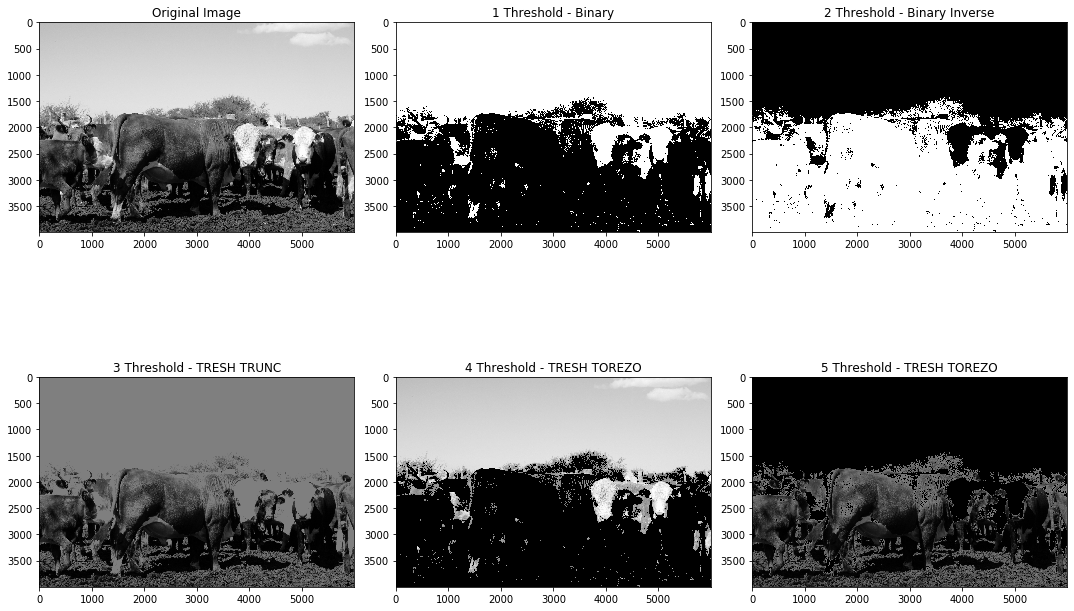

In [2]:
row, col = 2, 3
fig, axs = plt.subplots(row, col, figsize=(15, 10))
fig.tight_layout()
 
axs[0][0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0][0].set_title('Original Image')
cv2.imwrite('image.png', image)

# Valores por debajo de 127 van a 0(black, todo por encima va para 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
axs[0][1].imshow(cv2.cvtColor(thresh1, cv2.COLOR_BGR2RGB))
axs[0][1].set_title('1 Threshold - Binary')
cv2.imwrite('thresh1.png', thresh1)

# Valores por debajo de 127 van a 255 y valores sobre 127 van a 0 
ret,thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
axs[0][2].imshow(cv2.cvtColor(thresh2, cv2.COLOR_BGR2RGB))
axs[0][2].set_title('2 Threshold - Binary Inverse')
cv2.imwrite('thresh2.png', thresh2)



# Valores por encima de 127 son truncated a 127 
ret,thresh3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
axs[1][0].imshow(cv2.cvtColor(thresh3, cv2.COLOR_BGR2RGB))
axs[1][0].set_title('3 Threshold - TRESH TRUNC')
cv2.imwrite('thresh3.png', thresh3)

# Valores debajo de 127 van a 0, sobre 127 no cambian  
ret,thresh4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
axs[1][1].imshow(cv2.cvtColor(thresh4, cv2.COLOR_BGR2RGB))
axs[1][1].set_title('4 Threshold - TRESH TOREZO')
cv2.imwrite('thresh4.png', thresh4)

# Contrario a lo de arriba, debajo de 127 no hay cambios, sobre 127 van a  0
ret,thresh5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
axs[1][2].imshow(cv2.cvtColor(thresh5, cv2.COLOR_BGR2RGB))
axs[1][2].set_title('5 Threshold - TRESH TOREZO')
cv2.imwrite('thresh5.png', thresh5)

plt.show()

<h5>¿Hay una mejor forma de hacer thresholding?</h5>
La desventaja de estos metodos simples de threesholding es que necesitamos proveer un valor de threesholdThe biggest downfall of those simple threshold methods is that we need to provide the threshold value 

<h5>¿Hay una forma mas inteligente de hacer esto?</h5>
Existe el Adaptative Threesholding

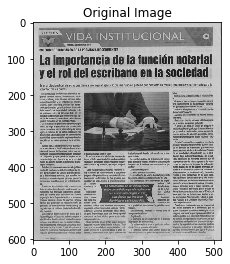

In [5]:
image = cv2.imread('diario.jpg', 0)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

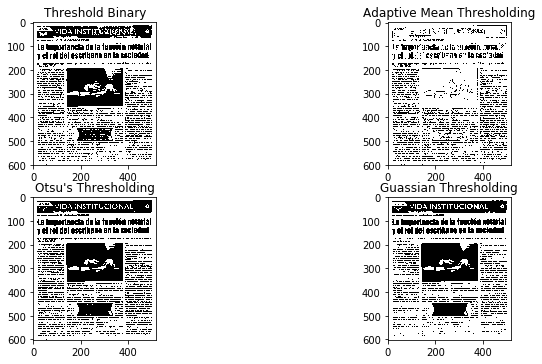

In [6]:
row, col = 2, 2
fig, axs = plt.subplots(row, col, figsize=(10, 5))
fig.tight_layout()

# Threeshold binario
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
axs[0][0].imshow(cv2.cvtColor(thresh1, cv2.COLOR_BGR2RGB))
axs[0][0].set_title('Threshold Binary')
cv2.imwrite('species_thresh1_binary.png', thresh1)

# Desenfocar las imagenes reducen el ruido.
image = cv2.GaussianBlur(image, (3, 3), 0)
# Usamos adaptiveThreshold
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                               cv2.THRESH_BINARY, 3, 5) 
axs[0][1].imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
axs[0][1].set_title('Adaptive Mean Thresholding')
cv2.imwrite('species_thresh2_adaptive.png', thresh)

_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
axs[1][0].imshow(cv2.cvtColor(th2, cv2.COLOR_BGR2RGB))
axs[1][0].set_title("Otsu's Thresholding")
cv2.imwrite('species_thresh3_otsu.png', th2)

# Otsu's thresholding con Gaussian filtering
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
axs[1][1].imshow(cv2.cvtColor(th3, cv2.COLOR_BGR2RGB))
axs[1][1].set_title("Guassian Thresholding")
cv2.imwrite('species_thresh4_gaussian.png', th3)

plt.show()